## Challenge Set 5

**Subject:** Linear Regression and Train/Test Split

**Date:** 2018-01-29

**Name:** Kaitlin Puryear

In [5]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline
    
df = pd.DataFrame.from_csv('2013_movies-Copy1.csv')
df.head(4)

,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
Title,,,,,,
The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00
Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00


## Challenge 1

**Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?**

The results of this model do not tell us much about the data. Since there is no variation in the X vector, the model has nothing with which to predict the y values. As a result, this model only tells us the intercept of the model. In a y=a+bx+cz model, we have found a. Because there is no variable in the dataset, we are finding the coefficient that does not have a variable attached to it. 

First, I created a column called "Constant" and filled it with 1's. Then, I converted the data into vectors using Patsy, and created a model using statsmodels' Ordinary Least Squares Regression. I printed a summary of the fit and discovered that the R^2 value was 0.000, meaning that 0% of the Domestic Total Gross data can be explained by this model. 

I printed a plot of the Predicted Movie Gross vs. Actual Movie Gross, which ended up looking like a horizontal line. The y-value that the horizontal line corresponded to was the intercept, which turned out to be a bit over 50 million. 

I plotted a histogram of the residuals, and majority of the residuals seem to be falling near -0.5, with some near 0. There are very few positive residuals except for the few that are quite high around 3. From an overall perspective, the shape of this plot takes the form of an inverse x relationship that has been shifted slightly negative.


In [6]:
#create a new empty column, then fill it fill of 1's

df = df.reindex(columns = ['Title', 
                           'Budget', 
                           'DomesticTotalGross', 
                           'Director',
                           'Rating',
                           'Runtime',
                           'ReleaseDate',
                           'Constant'])

for i in range(len(df)):
    df["Constant"][i] = int(1)


/home/gavin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [7]:
#use df["Constant"] to predict df["DomesticTotalGross"]

#Create feature matrix (X) and target vector (y)
y1, X1 = patsy.dmatrices('DomesticTotalGross ~ Constant', data=df, return_type="dataframe")

# Creating model
model = sm.OLS(y1, X1)

#Fit your model to set
fit1 = model.fit()

#Printing summary
fit1.summary()

/home/gavin/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       inf
Date:                Wed, 31 Jan 2018   Prob (F-statistic):                nan
Time:                        16:42:56   Log-Likelihood:                -1970.0
No. Observations:                 100   AIC:                             3942.
Df Residuals:                      99   BIC:                             3945.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
Constant     5.03e+07   4.37e+06     11.510      0.000    4.16e+07     5.9e+07
==============================================================================
Omnibus:                       51.114   Durbin-Watson:                   0.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.961
Skew:                           1.985   Prob(JB):                     4.45e-28
Kurtosis:                       6.804   Cond. No.                     7.24e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.81e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [4]:
#Plot Predicted vs. Actual

y_predicted = fit1.predict(X1)
y_predicted

plt.plot(y, y_predicted, 'b.')
plt.title('Predictions vs. Actual outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

NameError: name 'y' is not defined

**Grader's Note: Make sure your code in challenges runs as written. Fortunately I think this one is going to be a fairly easy fix.**

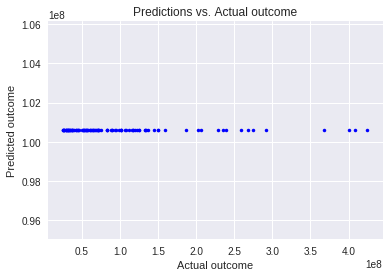

In [8]:
#Plot Predicted vs. Actual

y_predicted = fit1.predict(X1)
y_predicted

plt.plot(y1, y_predicted, 'b.')
plt.title('Predictions vs. Actual outcome')
plt.xlabel('Actual outcome')
plt.ylabel('Predicted outcome')

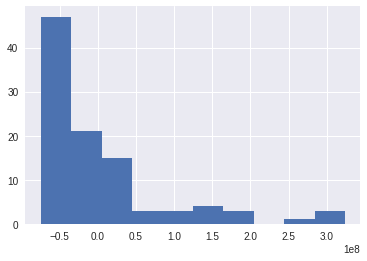

In [9]:
#Plot Histogram of residuals

fit1.resid.hist();

## Challenge 2

**Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?**

I added "Budget" as a factor in my 2nd model, fit2. 

In [11]:
#use a matrix of df["Constant"] and df["Budget"] to predict df["DomesticTotalGross"]
#Create feature matrix (X) and target vector (y)

y2, X2 = patsy.dmatrices('DomesticTotalGross ~ Constant + Budget', data=df, return_type="dataframe")
model = sm.OLS(y2, X2, missing='drop')
fit2 = model.fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.278
Method:                 Least Squares   F-statistic:                     34.82
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           6.80e-08
Time:                        16:44:51   Log-Likelihood:                -1738.1
No. Observations:                  89   AIC:                             3480.
Df Residuals:                      87   BIC:                             3485.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Constant     2.22e+07   6.33e+06      3.504      0.001    9.61e+06    3.48e+07
Budget         0.7846      0.133      5.901      0.000       0.520       1.049
==============================================================================
Omnibus:                       39.749   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               99.441
Skew:                           1.587   Prob(JB):                     2.55e-22
Kurtosis:                       7.091   Cond. No.                     2.68e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.13e-17. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

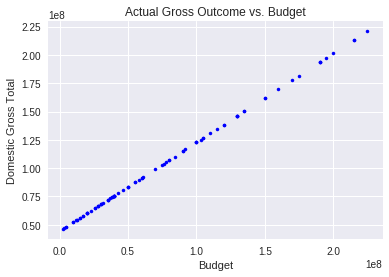

In [12]:
y_predicted = fit2.predict(X2)
y_predicted

plt.plot(X2["Budget"], y_predicted, 'b.')
plt.title('Actual Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross Total')

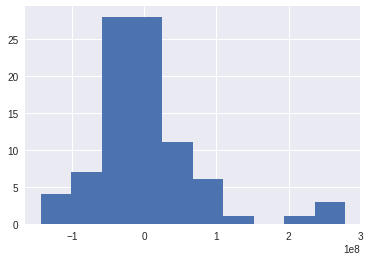

In [13]:
fit2.resid.hist();

## Challenge 3

Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [14]:
df['G'] = (df['Rating'] == 'G').astype(int)
df['PG'] = (df['Rating'] == 'PG').astype(int)
df['PG13'] = (df['Rating'] == 'PG13').astype(int)
df['R'] = (df['Rating'] == 'R').astype(int)

df

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Constant,G,PG,PG13,R
Title,,,,,,,,,,,,
The Hunger Games: Catching Fire,NaN,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00,1.0,0,0,0,0
Iron Man 3,NaN,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00,1.0,0,0,0,0
Frozen,NaN,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00,1.0,0,1,0,0
Despicable Me 2,NaN,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03 00:00:00,1.0,0,1,0,0
Man of Steel,NaN,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14 00:00:00,1.0,0,0,0,0
Gravity,NaN,100000000.0,274092705,Alfonso Cuaron,PG-13,91,2013-10-04 00:00:00,1.0,0,0,0,0
Monsters University,NaN,NaN,268492764,Dan Scanlon,G,107,2013-06-21 00:00:00,1.0,1,0,0,0
The Hobbit: The Desolation of Smaug,NaN,NaN,258366855,Peter Jackson,PG-13,161,2013-12-13 00:00:00,1.0,0,0,0,0
Fast & Furious 6,NaN,160000000.0,238679850,Justin Lin,PG-13,130,2013-05-24 00:00:00,1.0,0,0,0,0


**Grader's Note: You can use pd.get_dummies to do this less manually.**

In [15]:
y3, X3 = patsy.dmatrices('DomesticTotalGross ~ Constant + Budget + G + PG + PG13 + R', data=df, return_type="dataframe")
model = sm.OLS(y3, X3, missing='drop')
fit3 = model.fit()
fit3.summary()

/home/gavin/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/home/gavin/anaconda3/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/gavin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/gavin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/gavin/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.266
Method:                 Least Squares   F-statistic:                     11.61
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.87e-06
Time:                        16:46:17   Log-Likelihood:                -1737.7
No. Observations:                  89   AIC:                             3483.
Df Residuals:                      85   BIC:                             3493.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.023e+07   9.36e+06      2.160      0.034    1.61e+06    3.88e+07
Constant    2.023e+07   9.36e+06      2.160      0.034    1.61e+06    3.88e+07
Budget         0.7816      0.152      5.157      0.000       0.480       1.083
G          -2.227e-10   1.44e-09     -0.155      0.877   -3.08e-09    2.64e-09
PG          1.727e+07   2.26e+07      0.766      0.446   -2.76e+07    6.21e+07
PG13                0          0        nan        nan           0           0
R             3.4e+06   1.95e+07      0.174      0.862   -3.55e+07    4.23e+07
==============================================================================
Omnibus:                       37.951   Durbin-Watson:                   0.674
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.664
Skew:                           1.546   Prob(JB):                     5.58e-20
Kurtosis:                       6.788   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

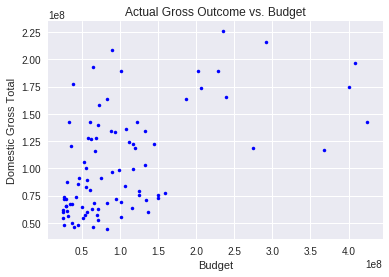

In [16]:
y_predicted = fit3.predict(X3)

plt.plot(y3, y_predicted, 'b.')
plt.title('Actual Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross Total')

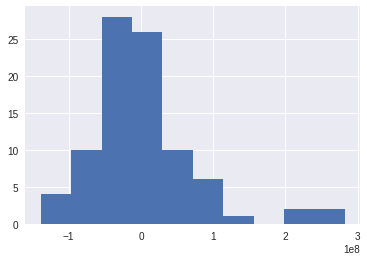

In [17]:
fit3.resid.hist();

## Challenge 4

Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.


Write about it.

In [18]:
y4, X4 = patsy.dmatrices('DomesticTotalGross ~ Budget + G + PG + PG13 + R + Runtime', data=df, return_type="dataframe")
model = sm.OLS(y4, X4, missing='drop')
fit4 = model.fit()
fit4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     9.089
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           3.77e-06
Time:                        16:46:36   Log-Likelihood:                -1737.0
No. Observations:                  89   AIC:                             3484.
Df Residuals:                      84   BIC:                             3497.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.354e+07   5.79e+07     -0.407      0.685   -1.39e+08    9.16e+07
Budget         0.7036      0.165      4.255      0.000       0.375       1.032
G           3.105e-07   8.27e-07      0.375      0.708   -1.33e-06    1.95e-06
PG          2.779e+07   2.42e+07      1.146      0.255   -2.04e+07     7.6e+07
PG13       -8.008e-10    3.1e-09     -0.258      0.797   -6.97e-09    5.37e-09
R           2.329e+06   1.95e+07      0.119      0.905   -3.65e+07    4.12e+07
Runtime     6.083e+05   5.21e+05      1.168      0.246   -4.27e+05    1.64e+06
==============================================================================
Omnibus:                       36.883   Durbin-Watson:                   0.740
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.319
Skew:                           1.525   Prob(JB):                     1.33e-18
Kurtosis:                       6.591   Cond. No.                     1.15e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.1e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

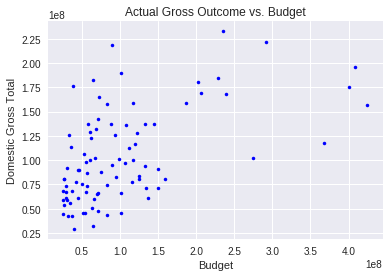

In [19]:
y_predicted = fit4.predict(X4)

plt.plot(y4, y_predicted, 'b.')
plt.title('Actual Gross Outcome vs. Budget')
plt.xlabel('Budget')
plt.ylabel('Domestic Gross Total')

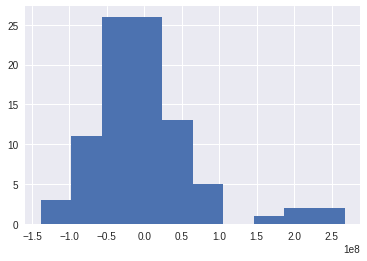

In [20]:
fit4.resid.hist();

## Challenge 5

Fitting and checking predictions on the exact same data set can be
misleading. Divide your data into two sets: a training and a test set
(roughly 75% training, 25% test is a fine split). Fit a model on the
training set, check the predictions (by plotting versus actual values)
in the test set.

In [22]:
from sklearn import cross_validation
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X4, y4, train_size = 0.75)

/home/gavin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [23]:
model5 = sm.OLS(y_train, X_train, missing ='drop')
fit5 = model5.fit()
fit5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     DomesticTotalGross   R-squared:                       0.365
Model:                            OLS   Adj. R-squared:                  0.323
Method:                 Least Squares   F-statistic:                     8.749
Date:                Wed, 31 Jan 2018   Prob (F-statistic):           1.19e-05
Time:                        16:52:04   Log-Likelihood:                -1285.7
No. Observations:                  66   AIC:                             2581.
Df Residuals:                      61   BIC:                             2592.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.98e+07   6.41e+07      0.465      0.644   -9.83e+07    1.58e+08
Budget         0.8423      0.187      4.511      0.000       0.469       1.216
G           -5.04e-07   1.05e-06     -0.479      0.634   -2.61e-06     1.6e-06
PG          2.029e+07   2.64e+07      0.768      0.446   -3.26e+07    7.32e+07
PG13        1.064e-09   1.63e-08      0.065      0.948   -3.15e-08    3.36e-08
R           5.673e+06   2.25e+07      0.252      0.802   -3.94e+07    5.08e+07
Runtime     6.806e+04   5.92e+05      0.115      0.909   -1.12e+06    1.25e+06
==============================================================================
Omnibus:                       25.617   Durbin-Watson:                   1.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.979
Skew:                           1.386   Prob(JB):                     2.82e-10
Kurtosis:                       5.882   Cond. No.                     1.74e+26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.1e-35. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [24]:
## Now predict on the test set with the training model
y_pred = fit5.predict(X_test)

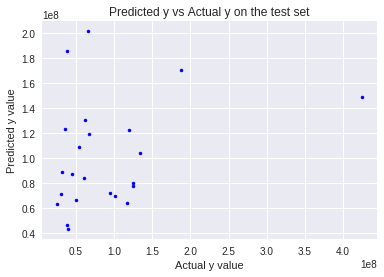

In [25]:
plt.plot(y_test, y_pred, 'b.')
plt.title('Predicted y vs Actual y on the test set')
plt.xlabel('Actual y value')
plt.ylabel('Predicted y value')

**Grader's Note: Good job with the code and diagrams (although check that your code runs as written.) However, make sure to explain your thoughts (for example, when Question 2 said "How can you interpret what's happening in the model?")**